**Clustering**

**Problem Statement**



Perform clustering for the crime data and identify the number of clusters            formed and draw inferences. Refer to crime_data.csv dataset.

CRISP-ML(Q) process model describes six phases:

Business and Data Understanding
Data Preparation
Model Building
Model Evaluation
Deployment
Monitoring and Maintenance

Objective(s): Maximize the security

Constraints: Minimize the crime

In [1]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.0/290.0 KB 9.3 MB/s eta 0:00:00


In [2]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
#importing required packages
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [4]:
#import the data
df=pd.read_csv('/content/crime_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
'''
EXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS
1st Moment Business Decision (Measures of Central Tendency)

1) Mean

2) Median

3) Mode
'''

'\nEXPLORATORY DATA ANALYSIS (EDA) / DESCRIPTIVE STATISTICS\n1st Moment Business Decision (Measures of Central Tendency)\n\n1) Mean\n\n2) Median\n\n3) Mode\n'

In [9]:
print("Mean\n")
print(df.mean())
print("\nMedian\n")
print(df.median())
print("\nMode\n")
print(df.mode())

Mean

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

Median

Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

Mode

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama     2.1    120.0      66.0  14.9
1           Alaska     2.2      NaN      80.0  16.3
2          Arizona     2.6      NaN       NaN   NaN
3         Arkansas     6.0      NaN       NaN   NaN
4       California     9.0      NaN       NaN   NaN
5         Colorado    13.2      NaN       NaN   NaN
6      Connecticut    15.4      NaN       NaN   NaN
7         Delaware     NaN      NaN       NaN   NaN
8          Florida     NaN      NaN       NaN   NaN
9          Georgia     NaN      NaN       NaN   NaN
10          Hawaii     NaN      NaN       NaN   NaN
11           Idaho     NaN      NaN       NaN   NaN
12        Illinois     NaN      NaN       NaN   NaN
13         Indiana     NaN      NaN       NaN   NaN
14          

<ipython-input-9-d18283fdce2b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.mean())
<ipython-input-9-d18283fdce2b>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.median())


In [10]:
"""
2nd Moment Business Decision (Measures of Dispersion)

1) Variance

2) Standard deviation

3) Range (maximum - minimum)
"""

'\n2nd Moment Business Decision (Measures of Dispersion)\n\n1) Variance\n\n2) Standard deviation\n\n3) Range (maximum - minimum)\n'

In [11]:
print("\n Variance \n")
print(df.var())
print("\n Standard Deviation\n")
print(df.std())


 Variance 

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

 Standard Deviation

Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64


<ipython-input-11-7060b471bb3d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())
<ipython-input-11-7060b471bb3d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())


In [12]:
"""
3rd Business Moment Decision (Skewness)

Measure of asymmetry in the data distribution
"""

'\n3rd Business Moment Decision (Skewness)\n\nMeasure of asymmetry in the data distribution\n'

In [13]:
print('Skewness\n')
df.skew()

Skewness



<ipython-input-13-6e4831380b96>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [14]:
"""
4th Business Moment Decision (Kurtosis)

Measure of peakedness - represents the overall spread in the data
"""

'\n4th Business Moment Decision (Kurtosis)\n\nMeasure of peakedness - represents the overall spread in the data\n'

In [15]:
print("Kurtosis\n")
df.kurt()

Kurtosis



<ipython-input-15-183966664bef>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [16]:
"""
Cleaning Unwanted columns

"""

'\nCleaning Unwanted columns\n\n'

In [17]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [19]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [21]:
"""
Handling duplicates:
"""

'\nHandling duplicates:\n'

In [22]:
dup=df.duplicated()

In [23]:
sum(dup)

0

In [24]:
"""
Missing Value Analysis
"""

'\nMissing Value Analysis\n'

In [25]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [26]:
"""
From above observation there is no null value in dataset
"""

'\nFrom above observation there is no null value in dataset\n'

In [27]:
"""
Outliers Analysis
"""

'\nOutliers Analysis\n'

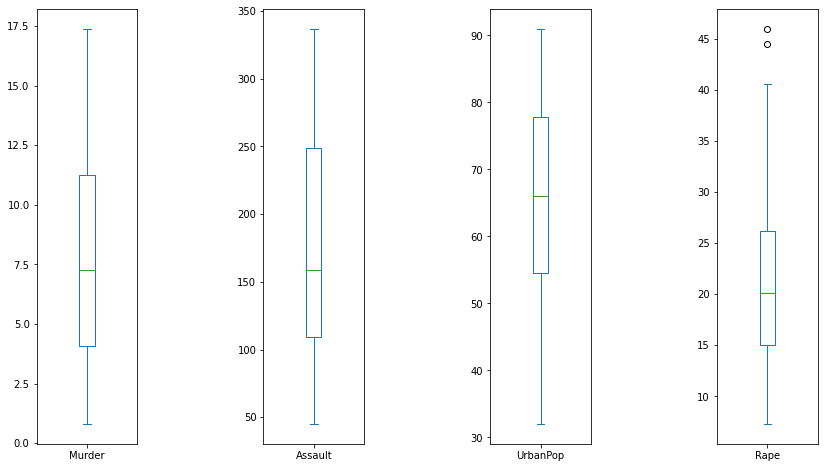

In [28]:
df.plot(kind = 'box', subplots = True, sharey = False, figsize = (14, 8)) 
plt.subplots_adjust(wspace = 1.25) 
plt.show()  

In [29]:
#Outlier treatment
winsor = Winsorizer(capping_method='iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Rape'])

df = winsor.fit_transform(df[['Murder','Assault','UrbanPop','Rape']])

In [30]:
#Zero and near zero variance
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          83.182041
dtype: float64

In [31]:
#Graphical representation
df

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.200
1,10.0,263,48,42.825
2,8.1,294,80,31.000
3,8.8,190,50,19.500
4,9.0,276,91,40.600
5,7.9,204,78,38.700
6,3.3,110,77,11.100
7,5.9,238,72,15.800
8,15.4,335,80,31.900
9,17.4,211,60,25.800


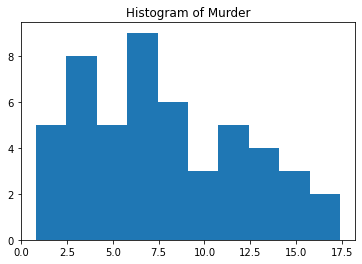

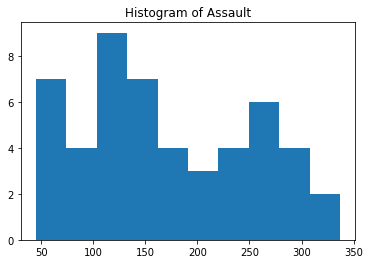

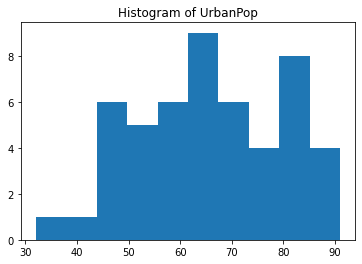

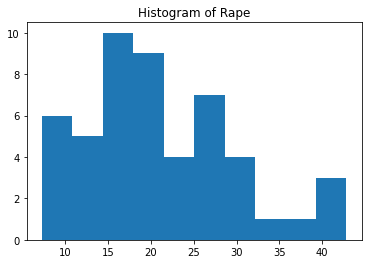

In [32]:
# Histogram describes the spread of data

for i in df.columns:
  plt.hist(x = df[i])
  plt.title("Histogram of " + str(i))
  plt.show()

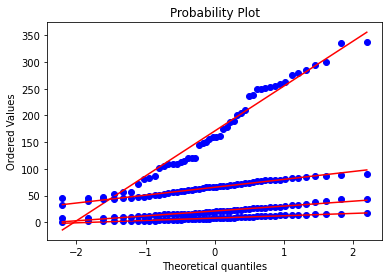

In [33]:
# Normal Quantile-Quantile Plot - Helps in understanding the distribution of the data - Normal distribution or not
import scipy.stats as stats
import pylab

# Checking Whether data is normally distributed
for i in df.columns:
  stats.probplot(df[i], dist = "norm", plot = pylab)

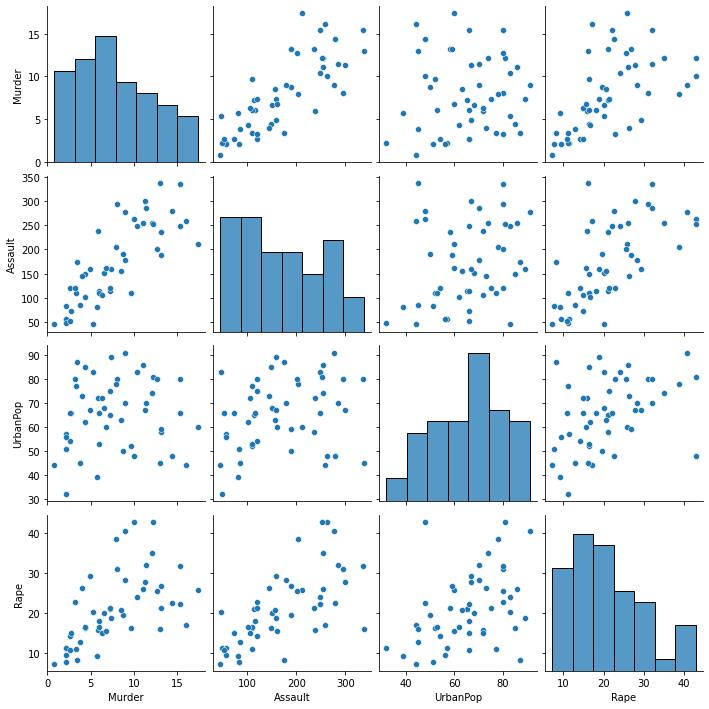

In [34]:
sns.pairplot(df)   # Use numerical variables for scatter plots

In [35]:
#Normalization
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [36]:
df = norm_func(df)

In [37]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.389444
std,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.218860
50%,0.388554,0.390411,0.576271,0.360310
75%,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000


In [38]:
'''
CLUSTERING MODEL BUILDING

'''

'\nCLUSTERING MODEL BUILDING\n\n'

In [39]:
# Libraries for creating scree plot or elbow curve 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df)
    TWSS.append(kmeans.inertia_)

TWSS

[6.7551821676223245,
 5.134910987938266,
 3.767090859114525,
 3.2620261753244018,
 2.9542469255772486,
 2.66532225124414,
 2.4516556426797798]

Text(0, 0.5, 'total_within_SS')

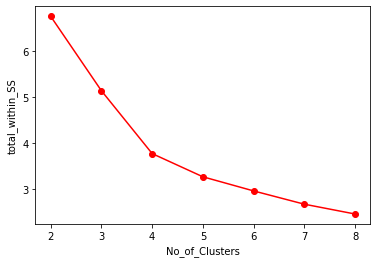

In [41]:
#Creating a scree plot to find out no.of cluster
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

In [42]:
#Detecting the best k=4 using TWSS value from scree plot
model = KMeans(n_clusters = 4)
yy = model.fit(df)

In [43]:
model.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [44]:
mb = pd.Series(model.labels_) 

In [45]:
df['clust'] = mb # creating a  new column and assigning it to new column 
df.head()

,Murder,Assault,UrbanPop,Rape,clust
0,0.746988,0.654110,0.440678,0.391274,3
1,0.554217,0.746575,0.271186,1.000000,1
2,0.439759,0.852740,0.813559,0.667136,1
3,0.481928,0.496575,0.305085,0.343420,3
4,0.493976,0.791096,1.000000,0.937368,1


In [46]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
clust       0
dtype: int64

In [47]:
#Evaluation of Number of Clusters using Silhouette Coefficient Technique
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range (2, 11):
    kmeans = KMeans(n_clusters = k, init = "random", random_state = 1)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    k = k
    Sil_coff = score
    silhouette_coefficients.append([k, Sil_coff])

In [48]:
silhouette_coefficients

[[2, 0.5435340865984277],
 [3, 0.6130812141367606],
 [4, 0.7066236744252283],
 [5, 0.5855466107962677],
 [6, 0.4876294174165247],
 [7, 0.3452955912387112],
 [8, 0.4394596941406627],
 [9, 0.34692690028568757],
 [10, 0.27290894103390767]]

In [ ]:
#Shilhouette Coeffficients shows, the number of clusters k = 4 as the best value